<a href="https://colab.research.google.com/github/ak-org/notebooks/blob/master/pytorch_cifar10_CNNNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision 
import torchvision.transforms as transforms
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
print(torch.__version__)

1.2.0


In [3]:
transform = transforms.Compose([ 
     #transforms.RandomCrop(32, padding=4),
     #transforms.RandomHorizontalFlip(), 
     transforms.ToTensor(), #57% accuracy with random crop and flip, 65% without it
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=50,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

170500096it [00:06, 27495096.65it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


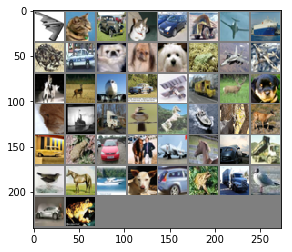

plane   cat   car   cat   car truck plane  ship  frog   car   dog   dog   dog  frog plane plane horse  deer plane   car plane truck  deer   dog   cat  ship truck  bird horse  ship  deer  deer   car  frog   car horse plane horse   car truck  bird horse  ship   dog   car  frog truck  bird   car  frog


In [4]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(50)))

In [0]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [0]:
import torch.nn as nn 
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(64, 128, 5)
    self.fc1 = nn.Linear(128 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 128 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x 

#net = Net()
 

In [0]:
class CNNNet(nn.Module):

    def __init__(self, num_classes=10):
        """CNN Builder."""
        super(CNNNet, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

net = CNNNet()

In [19]:
print(net)

CNNNet(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout2d(p=0.05, inplace=False)
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [0]:
import torch.optim as optim 
crit = nn.CrossEntropyLoss()
optim = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)


In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device is ", device)
if torch.cuda.is_available() == True:
  print("Moving model to GPU")
  net = net.to(device)
  net = torch.nn.DataParallel(net)
  cudnn.benchmark = True
else:
  print("Unable to find matching CUDA")

Device is  cuda:0
Moving model to GPU


In [22]:
n_epochs = 10
for epoch in range(n_epochs):
  running_loss = 0.0
  for i, data in tqdm(enumerate(trainloader, 0)):
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    optim.zero_grad()
    outputs = net(inputs)
    loss = crit(outputs, labels)
    loss.backward()
    optim.step()
    running_loss += loss.item() 
  print("Epoch : {}, loss = {}".format(epoch, running_loss/1000))

1000it [00:39, 25.65it/s]
3it [00:00, 25.54it/s]

Epoch : 0, loss = 1.691518245279789


1000it [00:39, 25.43it/s]
3it [00:00, 24.81it/s]

Epoch : 1, loss = 1.1213540912270545


1000it [00:39, 25.50it/s]
3it [00:00, 25.64it/s]

Epoch : 2, loss = 0.8609465064704418


1000it [00:39, 25.58it/s]
3it [00:00, 26.02it/s]

Epoch : 3, loss = 0.7237356282770634


1000it [00:39, 25.58it/s]
3it [00:00, 25.42it/s]

Epoch : 4, loss = 0.6220902808904648


1000it [00:39, 25.49it/s]
3it [00:00, 24.45it/s]

Epoch : 5, loss = 0.5457819938659668


1000it [00:39, 25.52it/s]
3it [00:00, 25.89it/s]

Epoch : 6, loss = 0.47804442106187345


1000it [00:39, 25.52it/s]
3it [00:00, 26.06it/s]

Epoch : 7, loss = 0.42135024397075177


1000it [00:39, 25.45it/s]
3it [00:00, 25.85it/s]

Epoch : 8, loss = 0.3683259922862053


1000it [00:39, 25.47it/s]

Epoch : 9, loss = 0.31977578497678044


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [25]:
images[0].shape, classes[labels[0]]

(torch.Size([3, 32, 32]), 'cat')

In [27]:
images = images.to(device)
labels = labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print("Predicted : ", classes[predicted[0]])

Predicted :  cat


In [28]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 80 %


In [29]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)        
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 91 %
Accuracy of   car : 88 %
Accuracy of  bird : 70 %
Accuracy of   cat : 64 %
Accuracy of  deer : 77 %
Accuracy of   dog : 54 %
Accuracy of  frog : 92 %
Accuracy of horse : 76 %
Accuracy of  ship : 90 %
Accuracy of truck : 87 %
